# NBA Player Analysis

In [1]:
#Importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats

In [2]:
# Prepare the data
nbadf = pd.read_csv('playergames.csv', sep= ";")
nbadf['Over Age 27'] = np.where((nbadf['Age'] > 27), 1, 0)
nbadf['Over Age 27'].value_counts()

#drop values we dont need
nbadf = nbadf.dropna()
nbadf = nbadf.drop_duplicates(subset='Player')
nbadf['Pos'] = nbadf['Pos'].replace('PF-SF', 'PF')

# Add important future rows
nbadf['AST/TOV'] = nbadf['AST'] / nbadf['TOV']
nbadf['Points Per Minute'] = nbadf['PTS'] / nbadf['MP']
nbadf['Assists Per Minute'] = nbadf['AST'] / nbadf['MP']
#there are more younger players by double in the league currently

In [3]:
display(nbadf)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Over Age 27,AST/TOV,Points Per Minute,Assists Per Minute
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.9,0.6,0.5,1.1,1.9,9.2,0,0.818182,0.444444,0.043478
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,2.3,0.9,1.1,1.9,2.3,8.6,1,1.210526,0.318519,0.085185
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,3.2,1.2,0.8,2.5,2.8,20.4,0,1.280000,0.589595,0.092486
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.1,0.3,0.3,0.7,1.7,7.9,0,1.571429,0.385366,0.053659
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.3,0.6,0.6,0.8,1.9,9.0,0,1.625000,0.412844,0.059633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,386,Jakob Poeltl,C,27,TOT,72,71,26.5,5.4,8.6,...,2.7,0.9,1.2,1.7,2.7,12.5,0,1.588235,0.471698,0.101887
496,387,Aleksej Pokusevski,PF,21,OKC,34,25,20.6,3.2,7.3,...,1.9,0.6,1.3,1.3,1.7,8.1,0,1.461538,0.393204,0.092233
497,388,Jordan Poole,PG,23,GSW,82,43,30.0,6.7,15.6,...,4.5,0.8,0.3,3.1,2.6,20.4,0,1.451613,0.680000,0.150000
498,389,Kevin Porter Jr.,PG,22,HOU,59,59,34.3,6.6,15.0,...,5.7,1.4,0.3,3.2,2.6,19.2,0,1.781250,0.559767,0.166181


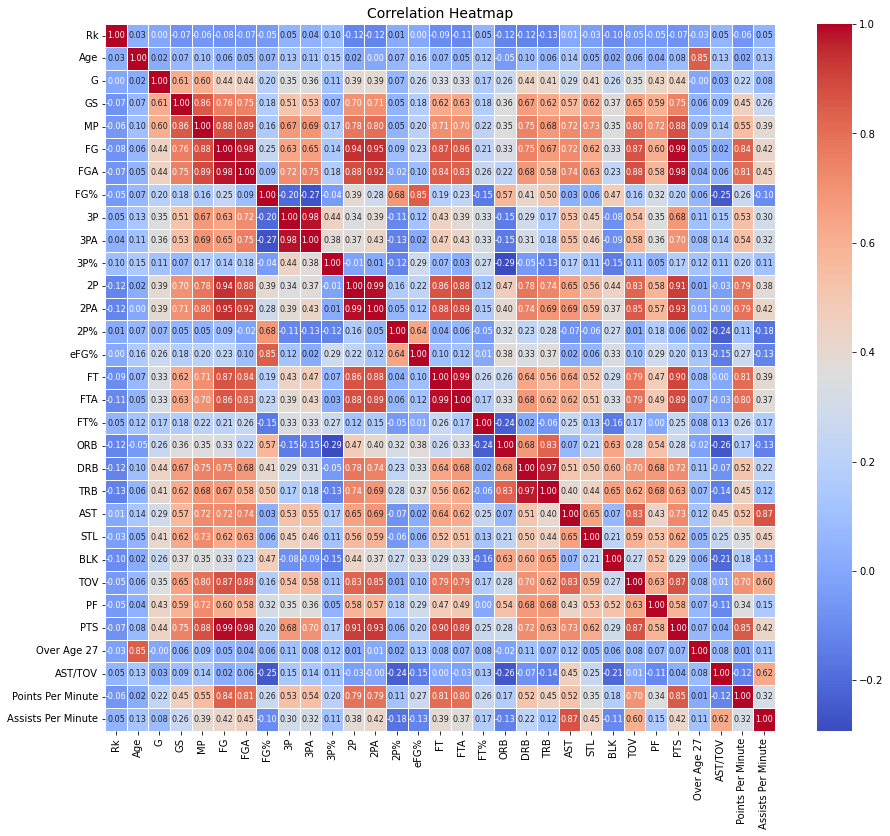

In [4]:

# Calculate the correlation matrix
corr_matrix = nbadf.corr()

# Set the figure size
plt.figure(figsize=(15, 13))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"fontsize": 8})

# Set the title
plt.title('Correlation Heatmap', fontsize=14)

plt.show()

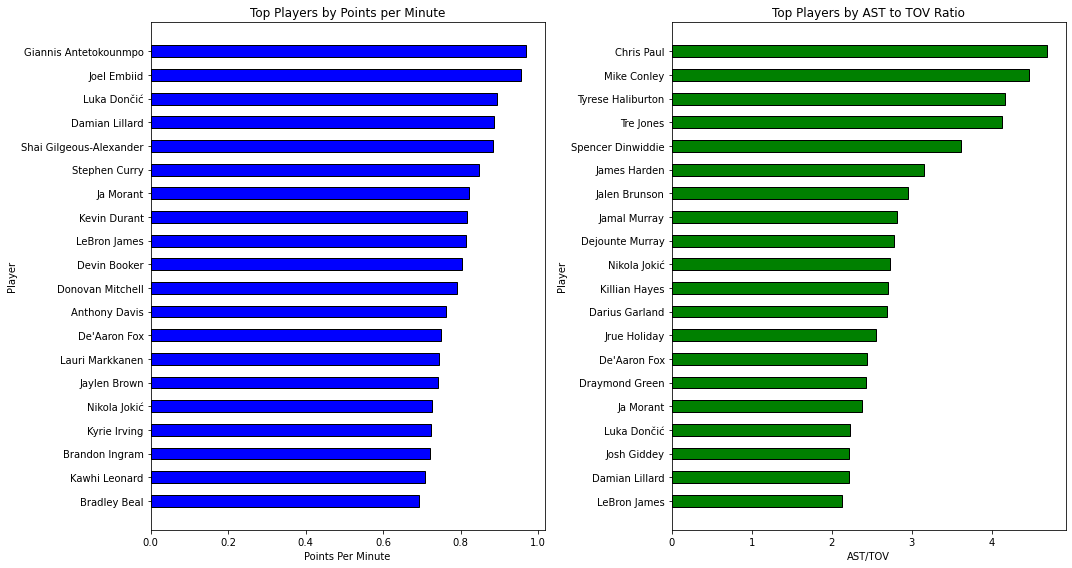

In [5]:
# Filter the data for Points per Minute 
filtered_points_data = nbadf.query("MP >= 20").query("PTS >= 20").sort_values('Points Per Minute', ascending=False).head(20)

# Filter the data for AST/TOV
filtered_ast_data = nbadf.query("AST >= 6").query("G >= 50").sort_values('AST/TOV', ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot for Points per Minute
axes[0].barh(filtered_points_data['Player'], filtered_points_data['Points Per Minute'], color='blue', height=0.5, edgecolor='black')
axes[0].set_xlabel('Points Per Minute')
axes[0].set_ylabel('Player')
axes[0].set_title('Top Players by Points per Minute')

# Plot for AST/TOV
axes[1].barh(filtered_ast_data['Player'], filtered_ast_data['AST/TOV'], color='green', height=0.5, edgecolor='black')
axes[1].set_xlabel('AST/TOV')
axes[1].set_ylabel('Player')
axes[1].set_title('Top Players by AST to TOV Ratio')

# Invert the y-axis to display in descending order
axes[0].invert_yaxis()
axes[1].invert_yaxis()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()



In the following plot we can see the top players by Points Per Minute and Top Players by AST/TOV. AST/TOV (Assist-to-Turnover Ratio) is calculated by dividing the number of assists (AST) by the number of turnovers (TOV) for each player.
PTS per minute (Points per Minute) is calculated by dividing the total points (PTS) by the total minutes played (MP) for each player.

Both ratios provide insights into a player's performance and efficiency in terms of assists, turnovers, and scoring rate. We can observe that Chris Paul has the highest AST/TOV Ratio indicating that he is efficient at setting up his teammates without turning the ball over.

In regards to Points Per Minute, you can observe that Giannis and Embiid both average close to a point per minute. This can mean an astonishing amount of points in a game, when taking into regard of how many minutes they play every game.

In [6]:
# Filter the data for players who have played a minimum of 65 games
min_games_played = 65
filtered_players = nbadf[nbadf['G'] >= min_games_played]

# Sort the filtered DataFrame by minutes played (MP) in descending order
most_available_players = filtered_players.sort_values(by='MP', ascending=False)
top_players = most_available_players.head(15)

# Reset the index to start from 0 and add 1 to create player numbers
top_players.reset_index(drop=True, inplace=True)
top_players.index += 1

# Create a table of the top players with the most minutes played
table = top_players[['Player', 'MP', 'G']]

# Display the table
display(table)


,Player,MP,G
1,Dejounte Murray,36.4,74
2,DeMar DeRozan,36.2,74
3,Luka Dončić,36.2,66
4,Anthony Edwards,36.0,79
5,Zach LaVine,35.9,77
6,Jaylen Brown,35.9,67
7,Donovan Mitchell,35.8,68
8,Mikal Bridges,35.7,83
9,OG Anunoby,35.6,67
10,Darius Garland,35.5,69


In the table above, we can observe the fifteen most available players in regards to minutes played. To qualify, players must achieve at least 65 games played (The minimum to qualify for any official NBA award).

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

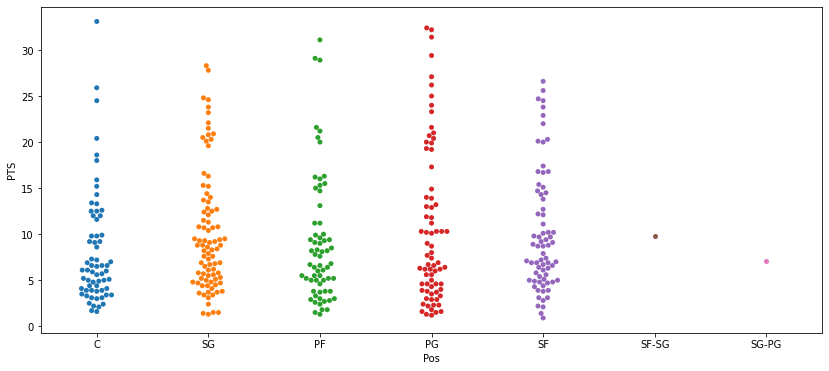

In [7]:
plt.figure(figsize=(14,6))
sns.swarmplot(x=nbadf["Pos"],
              y=nbadf["PTS"])

A swarm plot with the y-axis representing "PTS" (Points) and the x-axis representing "Position" visualizes the distribution of points scored by basketball players based on their positions. In this type of plot, each player's data point would be positioned along the x-axis according to their position (e.g., point guard, shooting guard, small forward, power forward, center), and the vertical position on the y-axis would represent the number of points they scored.

among the key points that can be withdrawn from such a plot is the density. Centers have the biggest outliers in regards to PTS density among all outliers.


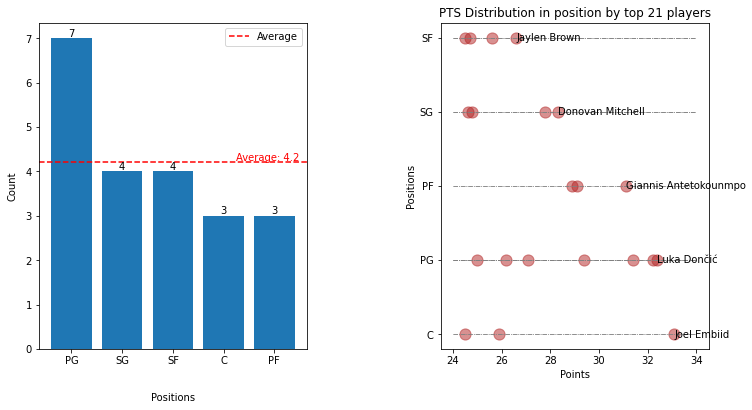

In [8]:
highestScorers = nbadf.loc[nbadf['PTS'] > 24].sort_values('PTS', ascending=False).drop_duplicates(subset='Player').reset_index(drop = True)

position = highestScorers['Pos'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the data
ax1.bar(position.index, position.values)

# Adding value labels to the bars
for i, value in enumerate(position.values):
    ax1.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Adding a horizontal line at the average count
average_count = np.mean(position.values)
ax1.axhline(average_count, color='red', linestyle='--', label='Average')
ax1.text(len(position) - 0.5, average_count, f'Average: {average_count:.1f}', ha='right', va='bottom', color='red')

# Adding text annotations on x-axis and y-axis
ax1.text(0.5, -0.15, 'Positions', transform=ax1.transAxes, ha='center', va='center')
ax1.text(-0.1, 0.5, 'Count', transform=ax1.transAxes, ha='center', va='center', rotation=90)

# Displaying the legend
ax1.legend()

# Scatter plot of PTS distribution by position
ax2.hlines(y=highestScorers.Pos, xmin=24, xmax=34, color='gray', alpha=0.7, linewidth=0.7, linestyles='dashdot')
ax2.scatter(y=highestScorers.Pos, x=highestScorers.PTS, s=125, color='firebrick', alpha=0.5)

# Adding player names to the scatter plot (only for the highest point scorer in each position)
for position in highestScorers['Pos'].unique():
    highest_scorer = highestScorers[highestScorers['Pos'] == position].iloc[0]
    ax2.annotate(highest_scorer['Player'], (highest_scorer['PTS'], highest_scorer['Pos']), ha='left', va='center')

# Customizing the plot
plt.title('PTS Distribution in position by top 21 players')
plt.xlabel('Points')
plt.ylabel('Positions')

# Display the plots
plt.subplots_adjust(wspace=0.5)
plt.show()


The barplot displays the amount of players in every single position among the top 21 scorers by (PPG). In that regard the Point Guards are most frequently observed followed by Shooting Guards and Shooting Forwards.  

The second subplot is a plot that showcases the relationship between the player's position (Pos) and points (PTS). The scatter plot uses the player's position as the y-axis and points as the x-axis. Each data point among the line reprents the distribution of the player. Here it can be observed that (Jaylen Brown, Donovan Mitchell, Giannis, Luka Doncic and Joel Embiid) are the highest PPG scorers in their respective positions.



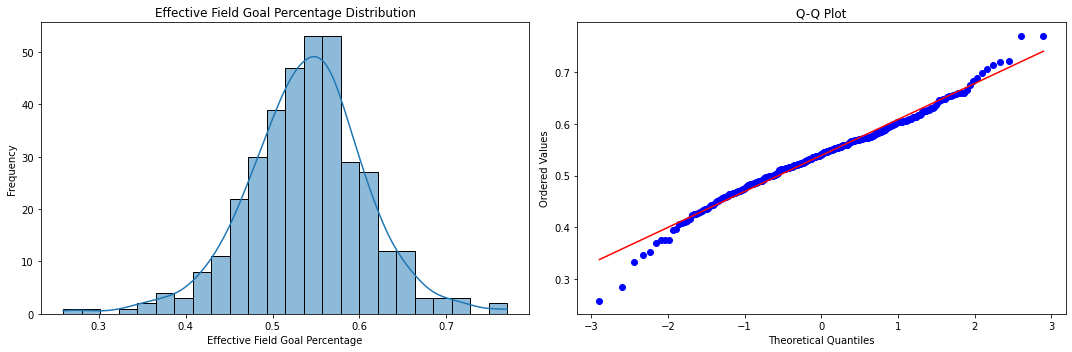

count    366.000000
mean       0.538992
std        0.069685
min        0.259000
25%        0.499250
50%        0.541000
75%        0.576750
max        0.770000
Name: eFG%, dtype: float64

In [9]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram and KDE plot
sns.histplot(nbadf['eFG%'], kde=True, ax=ax1)
ax1.set_title('Effective Field Goal Percentage Distribution')
ax1.set_xlabel('Effective Field Goal Percentage')
ax1.set_ylabel('Frequency')

# Q-Q plot
stats.probplot(nbadf['eFG%'], plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Ordered Values')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
statistics = nbadf['eFG%'].describe()

# Print the descriptive statistics
display(statistics)

Histogram of Effective Field Goal Percentage (eFG%):
The histogram plot visualizes the distribution of the effective field goal percentage (eFG%) across the dataset. The x-axis represents the eFG% values, and the y-axis represents the frequency or count of observations falling within each eFG% bin. The plot provides an overview of the distribution and can indicate the concentration of data points within specific eFG% ranges.

The mean eFG% of 0.538992 suggests that, on average, the players in the dataset have a shooting efficiency of around 53.9%. This indicates that more than half of their field goal attempts result in successful shots, taking into account the added value of three-pointers.

Q-Q Plot:
When the Q-Q plot closely follows a straight line as can be observed in our plot above, it indicates that the dataset's distribution is approximately similar to the theoretical distribution being compared. The straight line is typically the line of equality, where the quantiles of the dataset perfectly match the quantiles of the theoretical distribution. Deviations from the straight line suggest departures from the assumed distribution.



# Cluster segmentation and analysis

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the columns for clustering
columns = ['PTS','MP', 'G', 'eFG%', 'FG', 'FGA', 'FG%', '2P%', '3P%', 'Age', 'AST', 'STL', 'BLK', 'TOV', "ORB","DRB","TRB"]

# Create a subset of data for clustering
data = nbadf[columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Choose the number of clusters
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
nbadf['Cluster'] = labels

# Print the cluster assignments
print(nbadf[['Player', 'Cluster']])

# Perform further analysis on the clusters
cluster_1 = nbadf[nbadf['Cluster'] == 1]
cluster_2 = nbadf[nbadf['Cluster'] == 2]
cluster_3 = nbadf[nbadf['Cluster'] == 3]
cluster_4 = nbadf[nbadf['Cluster'] == 4]


                 Player  Cluster
0      Precious Achiuwa        0
1          Steven Adams        3
2           Bam Adebayo        3
3          Ochai Agbaji        2
4          Santi Aldama        0
..                  ...      ...
493        Jakob Poeltl        3
496  Aleksej Pokusevski        0
497        Jordan Poole        1
498    Kevin Porter Jr.        1
499  Michael Porter Jr.        0

[366 rows x 2 columns]


In [13]:
# Define the columns of interest
columns_of_interest = ['Player', 'PTS', 'MP', 'G', 'eFG%', 'FG', 'FGA', 'FG%', '2P%', '3P%', 'Age', 'AST', 'STL', 'BLK', 'TOV', 'ORB', 'DRB', 'TRB']

# Iterate through clusters and print cluster information
for cluster_num in range(1, k + 1):
    cluster_data = nbadf[nbadf['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_data[columns_of_interest])

Cluster 1:
               Player   PTS    MP   G   eFG%   FG   FGA    FG%    2P%    3P%  \
15         OG Anunoby  16.8  35.6  67  0.556  6.3  13.2  0.476  0.539  0.387   
24        LaMelo Ball  23.3  35.2  36  0.510  8.2  20.0  0.411  0.450  0.376   
28     Paolo Banchero  20.0  33.8  72  0.465  6.7  15.6  0.427  0.471  0.298   
29       Desmond Bane  21.5  31.7  58  0.568  7.8  16.2  0.479  0.534  0.408   
33     Scottie Barnes  15.3  34.8  77  0.487  6.0  13.2  0.456  0.505  0.281   
..                ...   ...   ...  ..    ...  ...   ...    ...    ...    ...   
477      Kelly Olynyk  12.5  28.6  68  0.583  4.1   8.2  0.499  0.576  0.394   
482   Kelly Oubre Jr.  20.3  32.3  48  0.497  7.4  17.1  0.431  0.510  0.319   
483        Chris Paul  13.9  32.0  59  0.513  5.0  11.3  0.440  0.482  0.375   
497      Jordan Poole  20.4  30.0  82  0.514  6.7  15.6  0.430  0.524  0.336   
498  Kevin Porter Jr.  19.2  34.3  59  0.522  6.6  15.0  0.442  0.501  0.366   

     Age  AST  STL  BLK  TOV

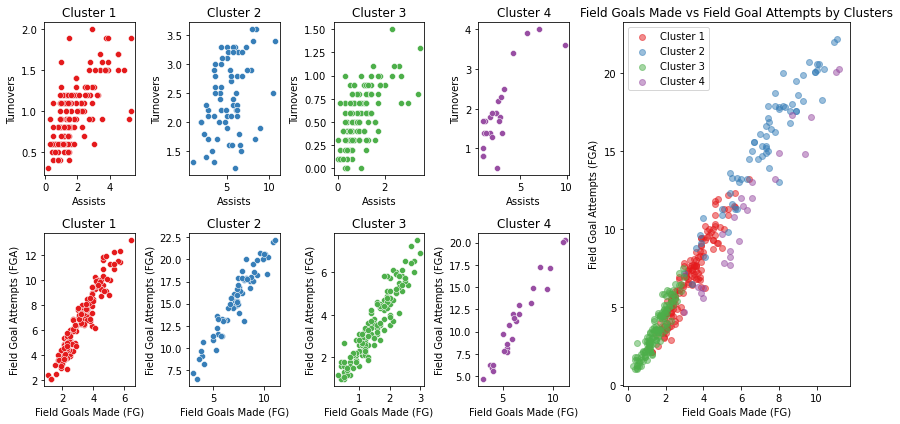

In [14]:
import matplotlib.gridspec as gridspec

# Define the layout of the subplots
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, k+1, width_ratios=[2]*k + [5])

# Define a color palette
colors = sns.color_palette('Set1', n_colors=k)

# Create subplots for AST vs TOV by cluster
for cluster_num in range(k):
    cluster_data = nbadf[nbadf['Cluster'] == cluster_num]
    ax = plt.subplot(gs[0, cluster_num])
    sns.scatterplot(x='AST', y='TOV', data=cluster_data, ax=ax, color=colors[cluster_num])
    ax.set_xlabel('Assists')
    ax.set_ylabel('Turnovers')
    ax.set_title(f'Cluster {cluster_num+1}')

# Create subplots for FG vs FGA by cluster
for cluster_num in range(k):
    cluster_data = nbadf[nbadf['Cluster'] == cluster_num]
    ax = plt.subplot(gs[1, cluster_num])
    sns.scatterplot(x='FG', y='FGA', data=cluster_data, ax=ax, color=colors[cluster_num])
    ax.set_xlabel('Field Goals Made (FG)')
    ax.set_ylabel('Field Goal Attempts (FGA)')
    ax.set_title(f'Cluster {cluster_num+1}')
    # Create subplots for AST vs TOV by cluster

# Create a scatter plot for all clusters
ax = plt.subplot(gs[:, -1])
for cluster_label in range(k):
    cluster_data = nbadf[nbadf['Cluster'] == cluster_label]
    plt.scatter(cluster_data['FG'], cluster_data['FGA'], label=f'Cluster {cluster_label+1}', alpha=0.5, color=colors[cluster_label])

# Set plot labels and title
plt.xlabel('Field Goals Made (FG)')
plt.ylabel('Field Goal Attempts (FGA)')
plt.title('Field Goals Made vs Field Goal Attempts by Clusters')

# Add legend
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

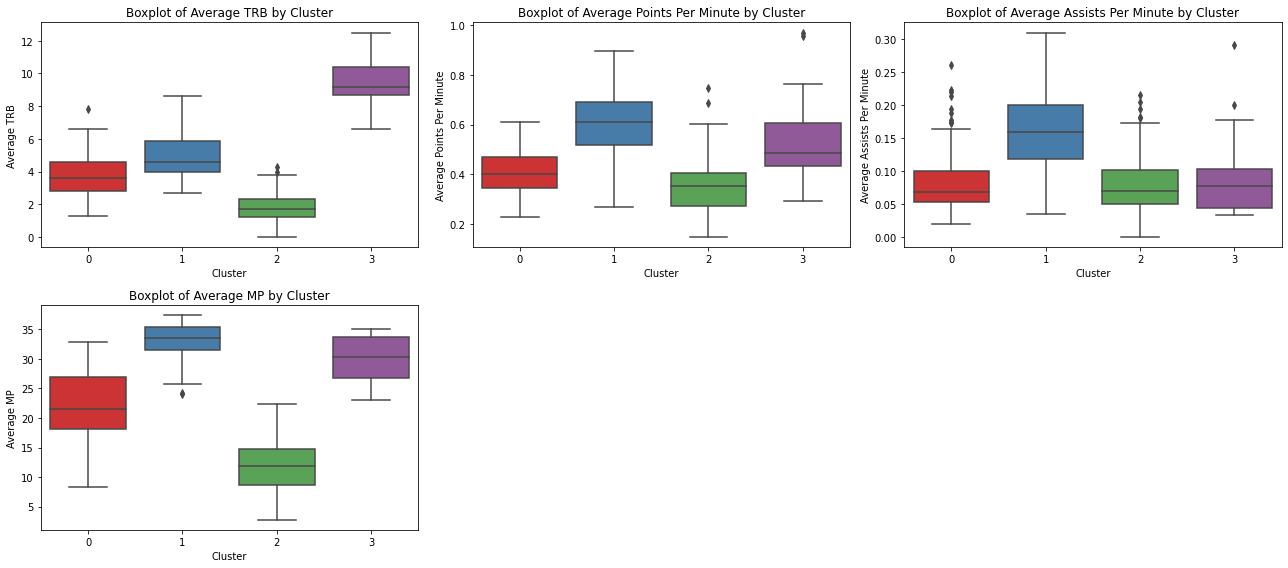

In [15]:
columns = ['Cluster', 'TRB', 'Points Per Minute', "Assists Per Minute", 'MP']

cluster_data = nbadf[columns]

colors = sns.color_palette('Set1', n_colors=k)

plt.figure(figsize=(18, 8))

# Create box plots for TRB, Points per Minute, MP, Turnovers per Minute, and Assists per Minute
for i, col in enumerate(columns[1:]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Cluster', y=col, data=cluster_data, palette=colors)
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {col}')
    plt.title(f'Boxplot of Average {col} by Cluster')

plt.tight_layout()
plt.show()

# Conclusion

Cluster 1: The players in this cluster (Red) are role players renowned for their consistency and versatility across all statistical categories. These players bring substantial value to their teams every minute they spend on the court, contributing effectively to various facets of the game

Cluster 2: It can be noted that Cluster 1 (Blue) shows a tendency to have higher stats (PTS, ASSISTS, FGA/FM) and in that regard are superior to their peers in most categories. These players are starters or superstars for their teams.

Cluster 3: These are players (Green) that aren't getting many minutes but also don't have a big impact while they're on the field. As can be be observed on the plot, the players in cluster 3 have lowest average points per minute out of any of the clusters.

Cluster 4: Likewise Cluster 4 (Purple) have very good stats and generally is on the field quite a lot. Cluster 4 is disctint in their ability to rebound that highly differentiates them from the other clusters.